In [7]:
%matplotlib inline
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as skt
import math
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns

In [8]:
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)

In [9]:
df=pd.read_excel('Training (C vs M).xlsx')
df2=df
data = df2.replace(np.nan, 0.0)
df2=data.replace({-0.01: 0.0})

In [10]:
# extractiong Sio2
df_Prob = df2[["Probability","Group"]]
df_Prob

,Probability,Group
0,0,Crust
1,0,Crust
2,0,Crust
3,0,Crust
4,0,Crust
...,...,...
3868,1,Megacryst
3869,1,Megacryst
3870,1,Megacryst
3871,1,Megacryst


In [11]:
df2.drop(df.columns[[0,1,2]], axis=1, inplace=True)
df2

,SiO2,TiO2,Al2O3,Cr2O3,MnO,FeOtotal,MgO,CaO,Na2O
0,39.79,0.10,23.14,0.01,0.52,18.25,12.93,5.90,0.00
1,38.65,0.00,21.16,0.00,2.40,24.22,3.51,10.07,0.00
2,37.63,0.21,20.71,0.09,6.08,22.12,2.35,10.81,0.00
3,38.60,0.28,21.01,0.06,1.10,22.14,5.08,11.74,0.00
4,39.09,0.06,21.01,0.00,1.56,27.61,3.22,8.15,0.03
...,...,...,...,...,...,...,...,...,...
3868,41.87,0.79,22.79,0.02,0.36,11.53,18.65,4.56,0.09
3869,41.73,1.16,21.86,0.20,0.36,12.19,18.49,4.57,0.11
3870,42.05,0.61,22.23,0.75,0.33,10.10,20.03,4.57,0.07
3871,41.70,0.79,22.48,0.07,0.36,12.40,18.32,4.56,0.10


In [12]:
#Factor Conversion
Mg_Fe=1.782
Ti_Si=0.752
Al_Si=1.179
Cr_Si=0.791
Mn_Si=0.847
Fe_Si=0.836
Mg_Si=1.491
Ca_Si=1.071
Na_Si=1.939

Conv =[0.752,1.179,0.791,0.847,0.836,1.491,1.071,1.939]

In [13]:
#taking out  df/SiO2)
df_O=df2.div(df2['SiO2'], axis=0)
# rename columns
df_O.columns = '('+ df_O.columns +'/'+ 'SiO2)'

df_O=df_O.round(6)
df_O.drop(df_O.columns[[0]], axis=1, inplace=True)

In [ ]:
df_O

In [ ]:
fig, ax = plt.subplots()
sns.scatterplot(data=df, x="Na2O", y="TiO2", hue="Group", style="Group")
ax.set_xlim(0.000, 0.200)

In [ ]:
fig, ax = plt.subplots()
sns.scatterplot(data=df, x="CaO", y="Cr2O3", hue="Group", style="Group")
ax.set_xlim(0.000, 20.0)
ax.set_ylim(0.000, 5.0)

In [ ]:
df_mg =df2[["MgO"]]
df_fe =df2[["FeOtotal"]]
df_ca =df2[["CaO"]]

In [ ]:
df_mg1 = (df_mg/40.305)
df_fe1 =(df_fe/71.8444)
df_ca1 =(df_ca/56.0774)

In [ ]:
df_fe['Sum']= df_mg1['MgO'] + df_fe1['FeOtotal']
df_ca['Sum_2']=df_ca1['CaO'] + df_mg1['MgO'] 

In [ ]:
df_mgfe=df_mg1.div(df_fe['Sum'], axis=0)
df_mgca=df_ca1.div(df_ca['Sum_2'], axis=0)
df_mgfe.rename(columns = {'MgO':'Mg/(Fe+Mg)'}, inplace = True)
df_mgca.rename(columns = {'CaO':'Ca/(Ca+Mg)'}, inplace = True)

In [3]:
df_mgfe

NameError: name 'df_mgfe' is not defined

In [16]:
df_mgca

,Ca/(Ca+Mg)
0,0.246967
1,0.673418
2,0.767777
3,0.624205
4,0.645285
...,...
3868,0.149468
3869,0.150847
3870,0.140883
3871,0.151752


In [17]:
df_n = pd.concat([df_mgfe, df_mgca,df_Prob,], axis=1)

(1.0, 0.0)

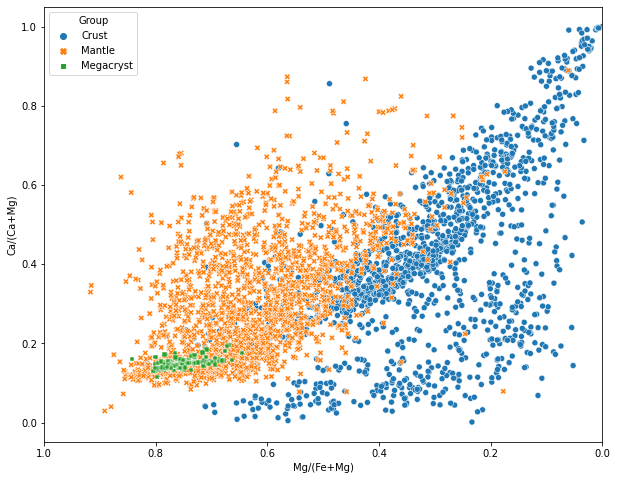

In [18]:
fig, ax = plt.subplots()
sns.scatterplot(data=df_n, x="Mg/(Fe+Mg)", y="Ca/(Ca+Mg)", hue="Group", style="Group")
ax.set_xlim(1.000, 0.00)

In [20]:
#taking out  df/Si
df_Ol=df_O.mul([0.752,1.179,0.791,0.847,0.836,1.491,1.071,1.939], axis='columns')
# rename columns
df_Ol.rename(columns = {'(TiO2/SiO2)':'Ti/Si','(Al2O3/SiO2)':'Al/Si','(Cr2O3/SiO2)':'Cr/Si','(MnO/SiO2)':'Mn/Si','(FeOtotal/SiO2)':'Fe/Si',
                        '(MgO/SiO2)':'Mg/Si','(CaO/SiO2)':'Ca/Si','(Na2O/SiO2)':'Na/Si'}, inplace = True)

df_Ol=df_Ol.round(4)

df_Ol

,Ti/Si,Al/Si,Cr/Si,Mn/Si,Fe/Si,Mg/Si,Ca/Si,Na/Si
0,0.0019,0.6857,0.0002,0.0111,0.3834,0.4845,0.1588,0.0000
1,0.0000,0.6455,0.0000,0.0526,0.5239,0.1354,0.2790,0.0000
2,0.0042,0.6489,0.0019,0.1369,0.4914,0.0931,0.3077,0.0000
3,0.0055,0.6417,0.0012,0.0241,0.4795,0.1962,0.3257,0.0000
4,0.0012,0.6337,0.0000,0.0338,0.5905,0.1228,0.2233,0.0015
...,...,...,...,...,...,...,...,...
3868,0.0142,0.6417,0.0004,0.0073,0.2302,0.6641,0.1166,0.0042
3869,0.0209,0.6176,0.0038,0.0073,0.2442,0.6606,0.1173,0.0051
3870,0.0109,0.6233,0.0141,0.0066,0.2008,0.7102,0.1164,0.0032
3871,0.0142,0.6356,0.0013,0.0073,0.2486,0.6550,0.1171,0.0046


In [21]:
to_log = df_Ol

df_log = to_log.applymap(lambda x: math.log10(x) if((x != 1.0) & (x!=0)) else 0)

df_log

,Ti/Si,Al/Si,Cr/Si,Mn/Si,Fe/Si,Mg/Si,Ca/Si,Na/Si
0,-2.721246,-0.163866,-3.698970,-1.954677,-0.416348,-0.314706,-0.799150,0.000000
1,0.000000,-0.190104,0.000000,-1.279014,-0.280752,-0.868381,-0.554396,0.000000
2,-2.376751,-0.187822,-2.721246,-0.863597,-0.308565,-1.031050,-0.511873,0.000000
3,-2.259637,-0.192668,-2.920819,-1.617983,-0.319211,-0.707301,-0.487182,0.000000
4,-2.920819,-0.198116,0.000000,-1.471083,-0.228780,-0.910802,-0.651111,-2.823909
...,...,...,...,...,...,...,...,...
3868,-1.847712,-0.192668,-3.397940,-2.136677,-0.637895,-0.177767,-0.933301,-2.376751
3869,-1.679854,-0.209293,-2.420216,-2.136677,-0.612254,-0.180061,-0.930702,-2.292430
3870,-1.962574,-0.205303,-1.850781,-2.180456,-0.697236,-0.148619,-0.934047,-2.494850
3871,-1.847712,-0.196816,-2.886057,-2.136677,-0.604499,-0.183759,-0.931443,-2.337242


In [22]:
# rename columns
df_log.columns = 'log(' + df_log.columns + ')'
df_log

,log(Ti/Si),log(Al/Si),log(Cr/Si),log(Mn/Si),log(Fe/Si),log(Mg/Si),log(Ca/Si),log(Na/Si)
0,-2.721246,-0.163866,-3.698970,-1.954677,-0.416348,-0.314706,-0.799150,0.000000
1,0.000000,-0.190104,0.000000,-1.279014,-0.280752,-0.868381,-0.554396,0.000000
2,-2.376751,-0.187822,-2.721246,-0.863597,-0.308565,-1.031050,-0.511873,0.000000
3,-2.259637,-0.192668,-2.920819,-1.617983,-0.319211,-0.707301,-0.487182,0.000000
4,-2.920819,-0.198116,0.000000,-1.471083,-0.228780,-0.910802,-0.651111,-2.823909
...,...,...,...,...,...,...,...,...
3868,-1.847712,-0.192668,-3.397940,-2.136677,-0.637895,-0.177767,-0.933301,-2.376751
3869,-1.679854,-0.209293,-2.420216,-2.136677,-0.612254,-0.180061,-0.930702,-2.292430
3870,-1.962574,-0.205303,-1.850781,-2.180456,-0.697236,-0.148619,-0.934047,-2.494850
3871,-1.847712,-0.196816,-2.886057,-2.136677,-0.604499,-0.183759,-0.931443,-2.337242


In [23]:
vif_data = pd.DataFrame()
vif_data["feature"] = df_log.columns
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(df_log.values, i)
                   for i in range(len(df_log.columns))]
print(vif_data)

      feature        VIF
0  log(Ti/Si)   8.046334
1  log(Al/Si)  10.200492
2  log(Cr/Si)   5.130334
3  log(Mn/Si)  29.356909
4  log(Fe/Si)  13.044664
5  log(Mg/Si)   4.177526
6  log(Ca/Si)   6.602297
7  log(Na/Si)   4.003480


In [24]:
df_log.describe()

,log(Ti/Si),log(Al/Si),log(Cr/Si),log(Mn/Si),log(Fe/Si),log(Mg/Si),log(Ca/Si),log(Na/Si)
count,3873.000000,3873.000000,3873.000000,3873.000000,3873.000000,3873.000000,3873.000000,3873.000000
mean,-2.310968,-0.186335,-2.154748,-2.005257,-0.454493,-0.444598,-0.784625,-1.804887
std,0.875757,0.063747,1.220603,0.383395,0.195230,0.288284,0.286101,1.205895
min,-3.698970,-2.795880,-3.698970,-3.397940,-1.235824,-2.698970,-3.522879,-3.301030
25%,-2.823909,-0.190036,-3.000000,-2.214670,-0.607831,-0.560352,-0.928118,-2.677781
50%,-2.468521,-0.182302,-2.638272,-2.086186,-0.451611,-0.377682,-0.752518,-2.318759
75%,-2.096910,-0.175614,-1.847712,-1.892790,-0.288361,-0.247337,-0.602060,0.000000
max,0.000000,-0.120331,0.000000,0.000000,-0.027011,0.000000,-0.002133,0.000000


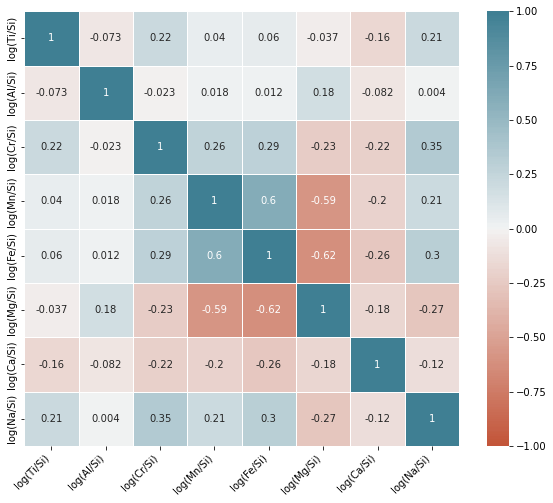

In [25]:
corr = df_log.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=True, 
    linewidths=.5    
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [25]:
'''dist_p = log_norm
g = sns.PairGrid(dist_p)
g.map_upper(sns.histplot)
g.map_lower(sns.kdeplot, fill=True)
g.map_diag(sns.histplot, kde=True)'''

'dist_p = log_norm\ng = sns.PairGrid(dist_p)\ng.map_upper(sns.histplot)\ng.map_lower(sns.kdeplot, fill=True)\ng.map_diag(sns.histplot, kde=True)'

In [26]:
#taking out log Mg/Fe
mg_fe=df_mg.div(df_fe['FeOtotal'], axis=0)
mg_fe=mg_fe.mul([1.782], axis='columns')
mg_fe = mg_fe.applymap(lambda x: math.log10(x) if((x != 1.0) & (x!=0)) else 0)

mg_fe.rename(columns = {'MgO':'log(Mg/Fe)'}, inplace = True)
mg_fe

,log(Mg/Fe)
0,0.101243
1,-0.587959
2,-0.722810
3,-0.388406
4,-0.682303
...,...
3868,0.459757
3869,0.431841
3870,0.548267
3871,0.420411


In [27]:
Ti_Si = df_log.iloc[:, :1]
Ti_Si

,log(Ti/Si)
0,-2.721246
1,0.000000
2,-2.376751
3,-2.259637
4,-2.920819
...,...
3868,-1.847712
3869,-1.679854
3870,-1.962574
3871,-1.847712


In [28]:
df_p = pd.concat([Ti_Si, mg_fe,df_Prob,], axis=1)

In [29]:
df_p

,log(Ti/Si),log(Mg/Fe),Probability,Group
0,-2.721246,0.101243,0,Crust
1,0.000000,-0.587959,0,Crust
2,-2.376751,-0.722810,0,Crust
3,-2.259637,-0.388406,0,Crust
4,-2.920819,-0.682303,0,Crust
...,...,...,...,...
3868,-1.847712,0.459757,1,Megacryst
3869,-1.679854,0.431841,1,Megacryst
3870,-1.962574,0.548267,1,Megacryst
3871,-1.847712,0.420411,1,Megacryst


(-3.0, 3.0)

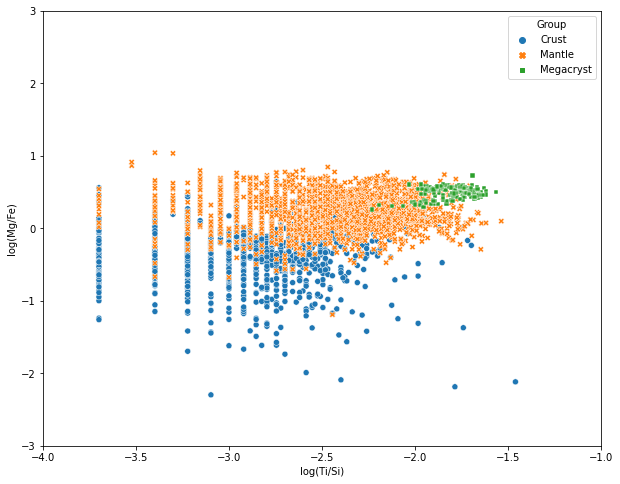

In [30]:
fig, ax = plt.subplots()
sns.scatterplot(data=df_p, x="log(Ti/Si)", y="log(Mg/Fe)", hue="Group", style="Group")
ax.set_xlim(-4.000, -1.00)
ax.set_ylim(-3.000, 3.00)

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
X = df_log.values
y = df_n[["Probability"]].values
# define the model
model = LogisticRegression()
# fit the model
model.fit(X, y)
# make predictions
yhat = model.predict(X)
# evaluate the predictions
acc = accuracy_score(y, yhat)
print('Accuracy: %.3f' % acc)

Accuracy: 0.908


C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [47]:
labels=['Crust','Mantle']

Confusion Matrix:
[[1348  228]
 [ 128 2169]]
Classification Report
              precision    recall  f1-score   support

       Crust       0.91      0.86      0.88      1576
      Mantle       0.90      0.94      0.92      2297

    accuracy                           0.91      3873
   macro avg       0.91      0.90      0.90      3873
weighted avg       0.91      0.91      0.91      3873



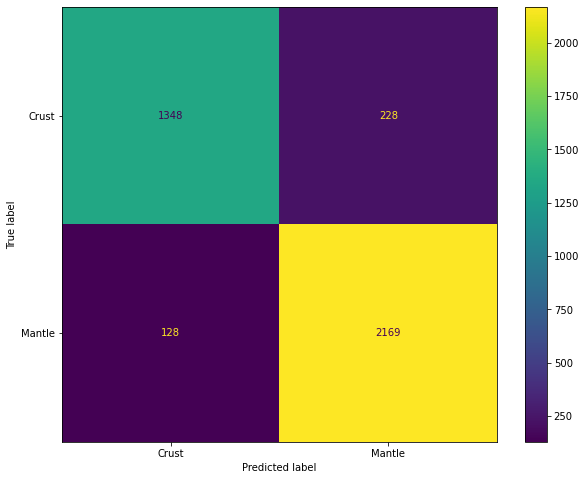

In [49]:
from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay

print("Confusion Matrix:")
print(confusion_matrix(y,yhat))

print("Classification Report")
print(classification_report(y, yhat,target_names=labels))

cm = confusion_matrix(y, yhat)
ConfusionMatrixDisplay(cm, display_labels=labels).plot()

In [72]:
X = df_p.iloc[:, :2]
y = df_p[["Probability"]].values
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [74]:
X

,log(Ti/Si),log(Mg/Fe)
0,-2.721246,0.101243
1,0.000000,-0.587959
2,-2.376751,-0.722810
3,-2.259637,-0.388406
4,-2.920819,-0.682303
...,...,...
3868,-1.847712,0.459757
3869,-1.679854,0.431841
3870,-1.962574,0.548267
3871,-1.847712,0.420411


In [75]:
X = sc.fit_transform(X)

In [85]:
# Helper function to plot a decision boundary.
def plot_decision_boundary(pred_func):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)
    

In [86]:
from sklearn.linear_model import LogisticRegression
# Train the logistic rgeression classifier
clf = skt.linear_model.LogisticRegression()

In [87]:
clf.fit(X,y)

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

(2.0, -2.0)

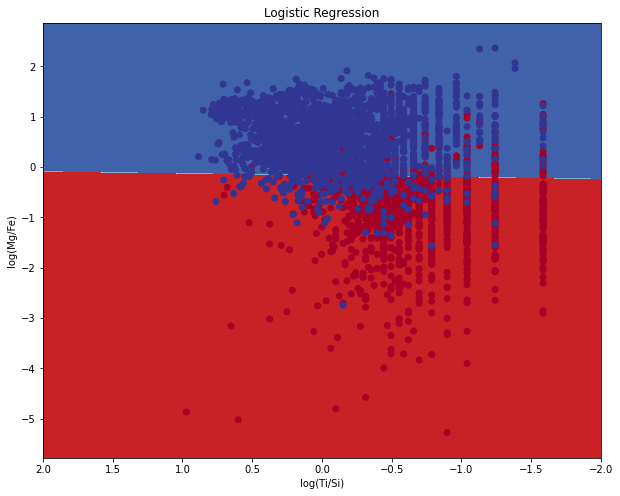

In [95]:
# Plot the decision boundary
fig, ax = plt.subplots()
plot_decision_boundary(lambda x: clf.predict(x))
plt.title("Logistic Regression")
plt.xlabel("log(Ti/Si)")
plt.ylabel("log(Mg/Fe)")
ax.set_xlim(2.000, -2.00)

In [89]:
b = clf.intercept_[0]

In [90]:
b

0.5129010432190394

In [91]:
w1, w2 = clf.coef_.T
# Calculate the intercept and gradient of the decision boundary.
c = -b/w2
m = -w1/w2

In [92]:
c

array([-0.15457615])

In [93]:
m

array([0.03695252])